In [1]:
from IPython.display import Image
%matplotlib inline

In [3]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
#we are taking only petal length and petal width
X = iris.data[:, [0,1,2, 3]]
y = iris.target

In [6]:
X.shape

(150, 4)

In [7]:
X[95:105,:]

array([[5.7, 3. , 4.2, 1.2],
       [5.7, 2.9, 4.2, 1.3],
       [6.2, 2.9, 4.3, 1.3],
       [5.1, 2.5, 3. , 1.1],
       [5.7, 2.8, 4.1, 1.3],
       [6.3, 3.3, 6. , 2.5],
       [5.8, 2.7, 5.1, 1.9],
       [7.1, 3. , 5.9, 2.1],
       [6.3, 2.9, 5.6, 1.8],
       [6.5, 3. , 5.8, 2.2]])

In [8]:
y[95:105]

array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

In [9]:
y.shape

(150,)

In [10]:
X.shape

(150, 4)

X.columns

In [11]:
X= X[:,[2,3]]

In [12]:
X.shape

(150, 2)

In [13]:
X[95:105,:]

array([[4.2, 1.2],
       [4.2, 1.3],
       [4.3, 1.3],
       [3. , 1.1],
       [4.1, 1.3],
       [6. , 2.5],
       [5.1, 1.9],
       [5.9, 2.1],
       [5.6, 1.8],
       [5.8, 2.2]])

In [14]:
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


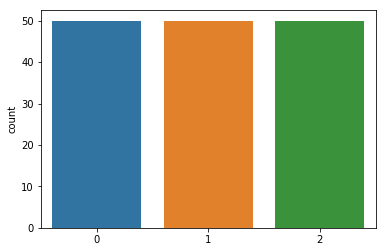

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.countplot(y)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [17]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [18]:
print("Petal length and Petal width mean",X_train[:,[0]].mean(), X_train[:,[1]].mean())

Petal length and Petal width mean 3.7895238095238097 1.1961904761904762


In [19]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [20]:
print("Petal length and Petal width mean after stdz: ",X_train_std[:,[0]].mean(), X_train_std[:,[1]].mean())

Petal length and Petal width mean after stdz:  1.1207965772406342e-16 2.3473286806360453e-16


In [21]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(n_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=None, n_iter=40, n_jobs=1, penalty=None, random_state=1,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [22]:
y_pred = ppn.predict(X_test_std)

In [23]:
print("y true labels are: ", y_test)
print("Predictions are  : ", y_pred)

y true labels are:  [2 0 0 2 1 1 2 1 2 0 0 2 0 1 0 1 2 1 1 2 2 0 1 2 1 1 1 2 0 2 0 0 1 1 2 2 0
 0 0 1 2 2 1 0 0]
Predictions are  :  [2 0 0 1 1 1 2 1 2 0 0 2 0 0 0 1 2 1 1 2 2 0 1 2 1 1 0 2 0 2 0 0 1 1 2 2 0
 0 0 1 2 2 1 0 0]


In [24]:
print("No of misclassified samples: ", np.sum(y_test!=y_pred))

No of misclassified samples:  3


In [25]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.93


In [26]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 1


In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.98


In [28]:
print("y true labels are: ", y_test)
print("Predictions are  : ", y_pred)

y true labels are:  [2 0 0 2 1 1 2 1 2 0 0 2 0 1 0 1 2 1 1 2 2 0 1 2 1 1 1 2 0 2 0 0 1 1 2 2 0
 0 0 1 2 2 1 0 0]
Predictions are  :  [2 0 0 1 1 1 2 1 2 0 0 2 0 1 0 1 2 1 1 2 2 0 1 2 1 1 1 2 0 2 0 0 1 1 2 2 0
 0 0 1 2 2 1 0 0]


In [29]:
print(X_train_std)

[[-1.33269725 -1.30380366]
 [-1.16537974 -1.30380366]
 [ 0.84243039  1.44465434]
 [ 1.0655204   1.18289644]
 [-1.44424226 -1.30380366]
 [ 1.0097479   1.57553329]
 [ 1.56747294  1.18289644]
 [-1.44424226 -1.30380366]
 [ 1.12129291  0.52850167]
 [ 0.45202286  0.13586482]
 [-0.27301968 -0.25677204]
 [ 0.06161534  0.26674377]
 [-1.38846976 -1.30380366]
 [ 0.50779537  0.00498586]
 [ 0.11738784  0.13586482]
 [ 0.73088538  0.92113853]
 [-1.05383474 -1.30380366]
 [-0.16147468 -0.25677204]
 [ 0.06161534  0.00498586]
 [-1.22115225 -1.30380366]
 [ 0.56356787  0.79025958]
 [ 1.73479045  1.44465434]
 [ 0.39625036  0.39762272]
 [ 0.39625036  0.13586482]
 [ 0.00584283 -0.12589309]
 [ 1.0097479   1.57553329]
 [ 0.50779537  0.26674377]
 [ 1.0097479   0.26674377]
 [ 1.12129291  1.31377539]
 [ 0.73088538  1.57553329]
 [ 0.17316034  0.13586482]
 [-1.27692475 -1.04204575]
 [ 1.62324544  1.31377539]
 [ 0.67511288  0.92113853]
 [ 0.56356787  0.79025958]
 [ 1.0097479   1.18289644]
 [ 0.22893285  0.39762272]
 

In [30]:
print("Confusion matrix is: ",confusion_matrix(y_test,y_pred) )

Confusion matrix is:  [[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)
print("Misclassified samples : ", (y_pred!=y_test).sum())
print("pred labels are :", y_pred)
print("Actual labl are :", y_pred)

Misclassified samples :  0
pred labels are : [2 0 0 2 1 1 2 1 2 0 0 2 0 1 0 1 2 1 1 2 2 0 1 2 1 1 1 2 0 2 0 0 1 1 2 2 0
 0 0 1 2 2 1 0 0]
Actual labl are : [2 0 0 2 1 1 2 1 2 0 0 2 0 1 0 1 2 1 1 2 2 0 1 2 1 1 1 2 0 2 0 0 1 1 2 2 0
 0 0 1 2 2 1 0 0]


In [32]:
print("Confusion matrix for knn is: ",confusion_matrix(y_test,y_pred) )

Confusion matrix for knn is:  [[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]


In [34]:
from sklearn.metrics import f1_score
print("F1 score for knn is: ",f1_score(y_test,y_pred, average='macro') )

F1 score for knn is:  1.0


In [ ]:
#ROC and AUC metrics

In [37]:
from sklearn.svm import SVC

In [38]:
svmlinClassifier = SVC(kernel="linear")

In [39]:
svmlinClassifier.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
y_pred = svmlinClassifier.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 1


In [41]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.98


In [42]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Misclassified samples for Kernel SVM: %d' % (y_test != y_pred).sum())
print('Accuracy for kernel SVM: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples for Kernel SVM: 1
Accuracy for kernel SVM: 0.98


In [43]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


In [44]:
models = (ppn,
          lr,
          svmlinClassifier,
          knn)
#models = (clf.fit(X_train_std, y_train) for clf in models)
titles = ('Perceptron',
          'Linear Regression',
          'SVM Linear',
          'KNN')

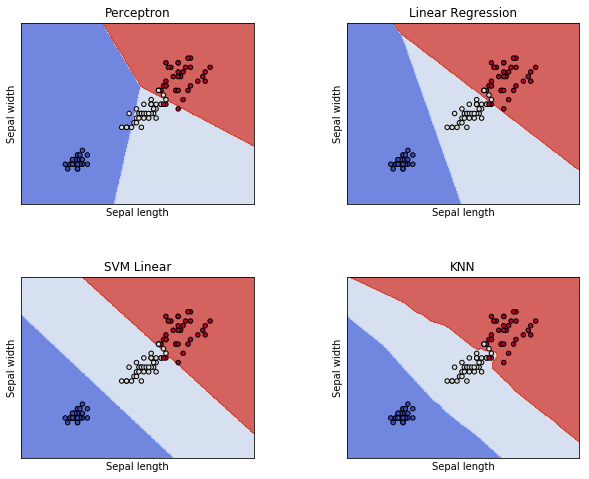

In [45]:


# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2, figsize=(10,8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X_train_std[:, 0], X_train_std[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()


In [84]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
from sklearn.datasets import make_moons
X_moon, y_moon = make_moons(n_samples=200, random_state=123)

In [85]:
X_moon.shape

(200, 2)

In [86]:
y_moon.shape

(200,)

In [87]:
y_moon

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1])

In [89]:
from mlxtend.classifier import MultiLayerPerceptron
mlp = MultiLayerPerceptron( 
                   l2=0.0, 
                   l1=0.0, 
                   epochs=4000, 
                   eta=0.01, 
                   decrease_const=0.0,
                   minibatches=1, 
                   random_seed=0)
 

In [96]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=25, 
                                random_state=1,
                                n_jobs=2)


/Users/apple/anaconda3/lib/python3.6/site-packages/mlxtend/_base/_classifier.py:19: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if not np.issubdtype(y[0], int):


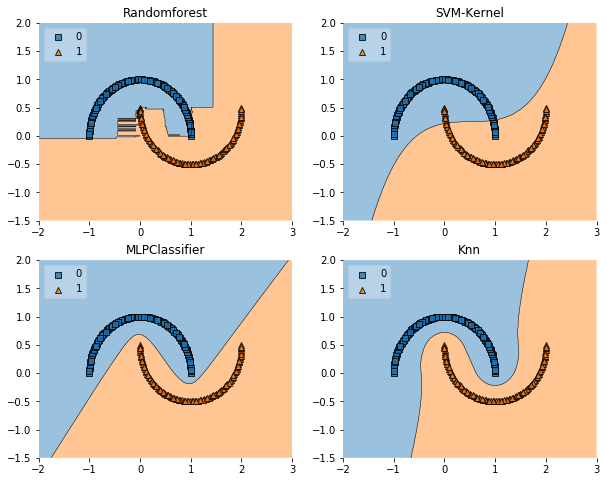

In [97]:
import itertools
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(2, 2)
from mlxtend.plotting import plot_decision_regions
fig = plt.figure(figsize=(10,8))
for clf, lab, grd in zip([forest, svm,mlp,knn ],
                         [ 'Randomforest', 'SVM-Kernel', 'MLPClassifier', 'Knn'],
                         itertools.product([0, 1], repeat=2)):
 
    clf.fit(X_moon, y_moon)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_moon, y=y_moon, clf=clf, legend=2)
    plt.title(lab)
 
plt.show()